In [21]:
import pandas as pd

In [22]:
df = pd.read_csv('Downloads/user_behavior_dataset.csv')
df

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [24]:
df.isna().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [25]:
df.nunique()

User ID                       700
Device Model                    5
Operating System                2
App Usage Time (min/day)      387
Screen On Time (hours/day)    108
Battery Drain (mAh/day)       628
Number of Apps Installed       86
Data Usage (MB/day)           585
Age                            42
Gender                          2
User Behavior Class             5
dtype: int64

In [26]:
# Display basic statistics and check for any missing values
print(df.describe())

         User ID  App Usage Time (min/day)  Screen On Time (hours/day)  \
count  700.00000                700.000000                  700.000000   
mean   350.50000                271.128571                    5.272714   
std    202.21688                177.199484                    3.068584   
min      1.00000                 30.000000                    1.000000   
25%    175.75000                113.250000                    2.500000   
50%    350.50000                227.500000                    4.900000   
75%    525.25000                434.250000                    7.400000   
max    700.00000                598.000000                   12.000000   

       Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)  \
count               700.000000                700.000000           700.000000   
mean               1525.158571                 50.681429           929.742857   
std                 819.136414                 26.943324           640.451729   
min      

In [27]:
# Generate a correlation matrix for analysis
correlation_matrix = df.corr()
print(correlation_matrix)

                             User ID  App Usage Time (min/day)  \
User ID                     1.000000                 -0.024957   
App Usage Time (min/day)   -0.024957                  1.000000   
Screen On Time (hours/day) -0.014287                  0.950333   
Battery Drain (mAh/day)    -0.019377                  0.956385   
Number of Apps Installed   -0.023914                  0.955253   
Data Usage (MB/day)        -0.014527                  0.942308   
Age                         0.045188                  0.004382   
User Behavior Class        -0.016242                  0.970498   

                            Screen On Time (hours/day)  \
User ID                                      -0.014287   
App Usage Time (min/day)                      0.950333   
Screen On Time (hours/day)                    1.000000   
Battery Drain (mAh/day)                       0.948983   
Number of Apps Installed                      0.946975   
Data Usage (MB/day)                           0.941322   

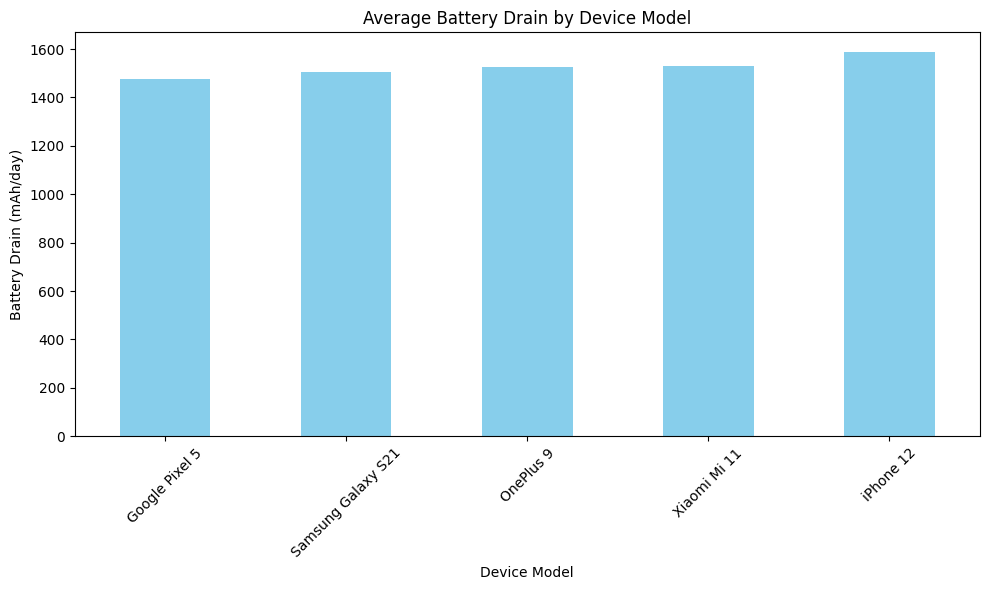

In [28]:
def plot_battery_drain_by_device(df):
    # Calculate the average battery drain for each device model
    avg_battery_drain = df.groupby('Device Model')['Battery Drain (mAh/day)'].mean().sort_values()
    
    # Plotting the bar chart
    plt.figure(figsize=(10, 6))
    avg_battery_drain.plot(kind='bar', color='skyblue')
    plt.title('Average Battery Drain by Device Model')
    plt.xlabel('Device Model')
    plt.ylabel('Battery Drain (mAh/day)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the function
plot_battery_drain_by_device(df)

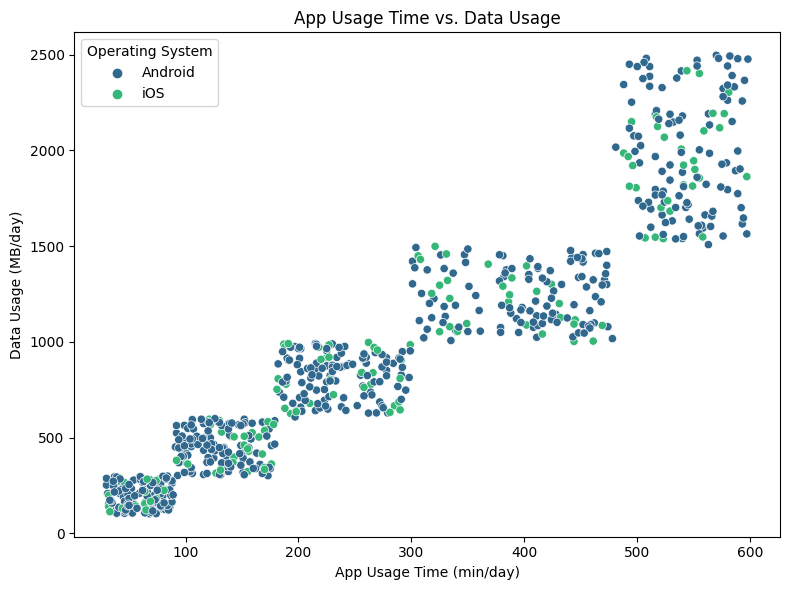

In [29]:
def plot_app_usage_vs_data_usage(df):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='App Usage Time (min/day)', y='Data Usage (MB/day)', hue='Operating System', data=df, palette='viridis')
    plt.title('App Usage Time vs. Data Usage')
    plt.xlabel('App Usage Time (min/day)')
    plt.ylabel('Data Usage (MB/day)')
    plt.legend(title='Operating System')
    plt.tight_layout()
    plt.show()

# Call the function
plot_app_usage_vs_data_usage(df)

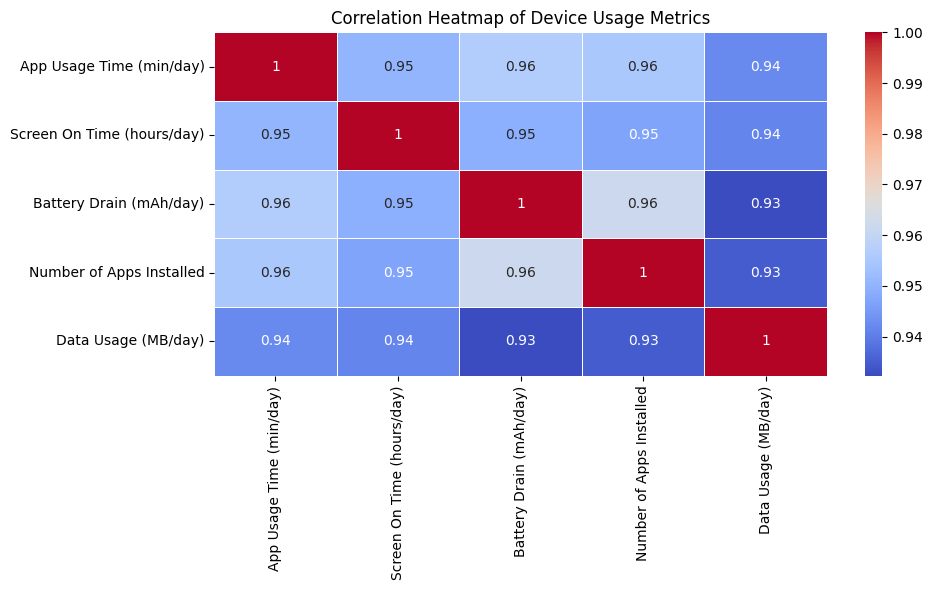

In [31]:
def plot_correlation_heatmap(df):
    # Select key columns for correlation analysis
    selected_columns = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 
                        'Number of Apps Installed', 'Data Usage (MB/day)']
    correlation_matrix = df[selected_columns].corr()
    
    # Plotting the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap of Device Usage Metrics')
    plt.tight_layout()
    plt.show()

# Call the function
plot_correlation_heatmap(df)
